# QBAF-Py: Examples
This noteboook provides some examples for how to use QBAF-Py.

## Instantiating QBAFs
Let us first instantiate a QBAF.

In [1]:
from qbaf import QBAFramework, QBAFARelations
from qbaf_visualizer.Visualizer import visualize

args = ['a', 'b', 'c', 'd', 'e', 'f']
initial_strengths = [0.5, 0.2, 0.85, 0.65, 0.4, 1]
atts = [('c', 'a'), ('e', 'b'), ('f', 'c')]
supps = [('b', 'a'), ('d', 'a'), ('e', 'c')]
qbaf_0 = QBAFramework(args, initial_strengths, atts, supps, semantics="QuadraticEnergy_model")


The semantics that will later be applied is tied to the QBAF instantiation.
Here, we specify the quadratic energy semantics.

## Drawing Inferences
As we have instantiated our QBAF with a specific semantics, the inferences (final strengths) are readily available:

In [2]:
final_strengths = qbaf_0.final_strengths
print(final_strengths)

{'e': 0.4, 'b': 0.1724137931034483, 'f': 1.0, 'd': 0.65, 'c': 0.625, 'a': 0.5187551724162596}


We update the visualizations to also show the final strengths of the arguments.
For this, we call our visualization function, with the parameter `with_fs` set to `True`.

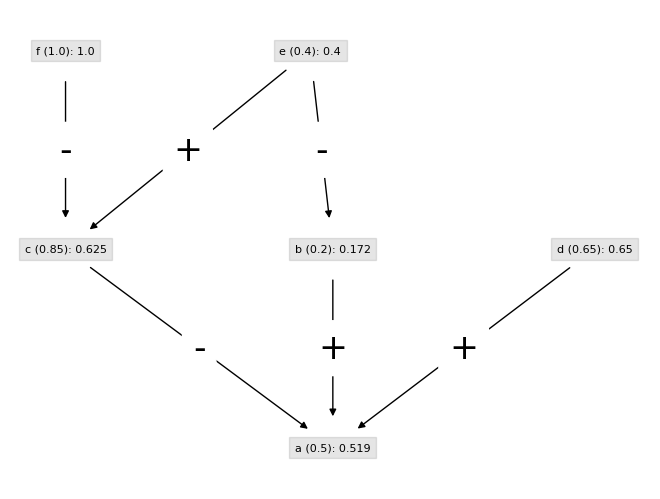

In [3]:
visualize(qbaf_0, with_fs=True, round_to=3)

## Generating Explanations
Given two argumentation frameworks and two arguments therein (so-called *topic arguments*), we can explain changes in the relative strength of these arguments (see: Kampik and Čyras. [Explaining Change in Quantitative Bipolar Argumentation](https://www.diva-portal.org/smash/get/diva2:1690830/FULLTEXT02). First, we instantiate two QBAFs and compute their final strengths; note that here, we use a naive semantics (`basic_model`), which simply subtracts the final strengths of attackers and adds the final strength of supporters.

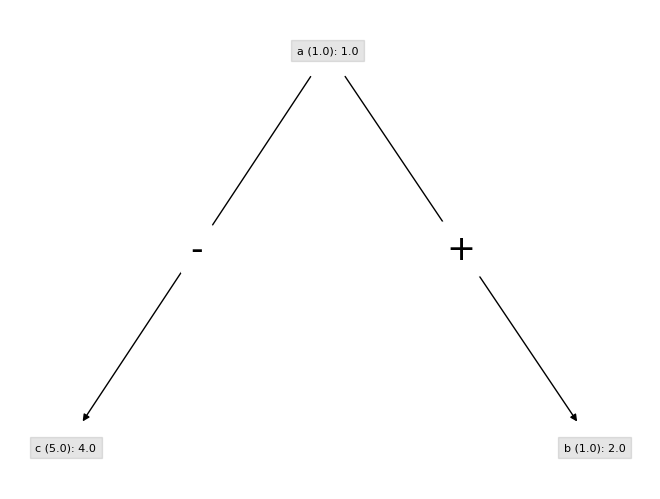

In [4]:
args_1 = ['a', 'b', 'c']
initial_strengths_1 = [1, 1, 5]
atts_1 = [('a', 'c')]
supps_1 = [('a', 'b')]
qbaf_1 = QBAFramework(args_1, initial_strengths_1, atts_1, supps_1, semantics="basic_model")

args_2 = ['a', 'b', 'c', 'd', 'e']
initial_strengths_2 = [2, 1, 5, 1, 3]
atts_2 = [('a', 'c'), ('d', 'a'), ('e', 'c')]
supps_2 = [('a', 'b'), ('d', 'e')]
qbaf_2 = QBAFramework(args_2, initial_strengths_2, atts_2, supps_2, semantics="basic_model")

visualize(qbaf_1, with_fs=True)

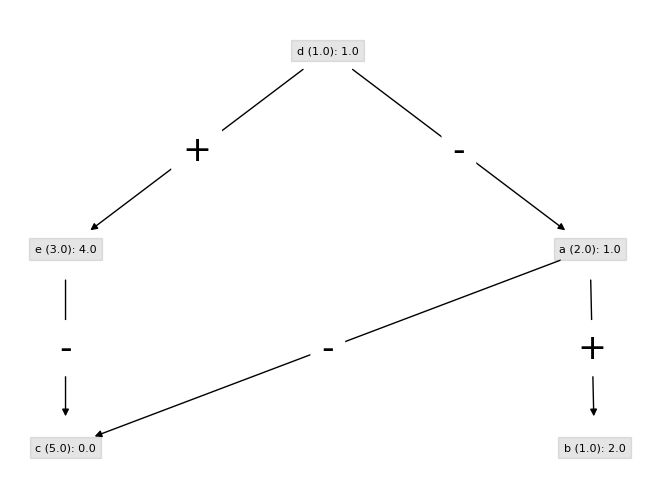

In [5]:
visualize(qbaf_2, with_fs=True)

As we can see, `b` is strength-inconsistent w.r.t. `c` (and `qbaf_1`, `qbaf_2`):

In [6]:
print(f'Are a and b strenght-consistent? {qbaf_1.are_strength_consistent(qbaf_2, "b", "c")}')

Are a and b strenght-consistent? False


Now, we can determine and visualize strength inconsistency explanations.

Minimal sufficient explanations: [{'e'}, {'a'}]


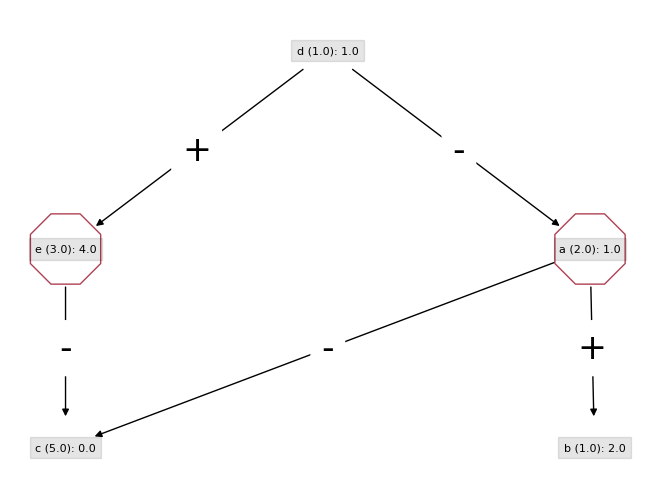

In [7]:
min_sufficient_explanations = qbaf_1.minimalSSIExplanations(qbaf_2, 'b', 'c')
print(f'Minimal sufficient explanations: {min_sufficient_explanations}')
visualize(qbaf_2, explanations=min_sufficient_explanations, with_fs=True)

Minimal counterfactual explanations: [{'e'}]


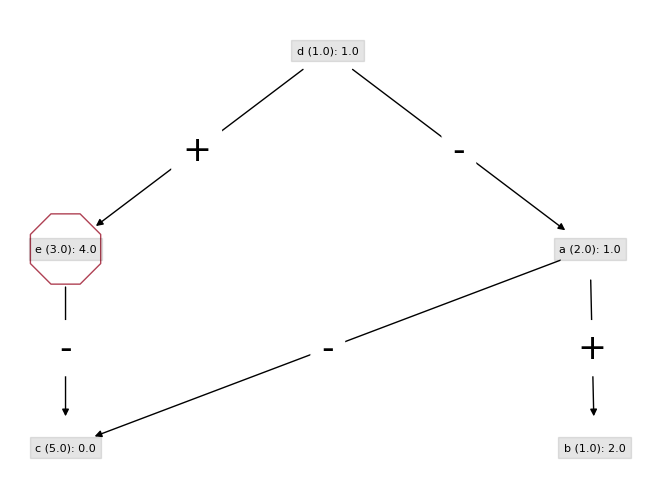

In [8]:
min_counterfactual_explanations = qbaf_1.minimalCSIExplanations(qbaf_2, 'b', 'c')
print(f'Minimal counterfactual explanations: {min_counterfactual_explanations}')
visualize(qbaf_2, explanations=min_counterfactual_explanations, with_fs=True)

Minimal necessary explanations: [{'e', 'a'}]


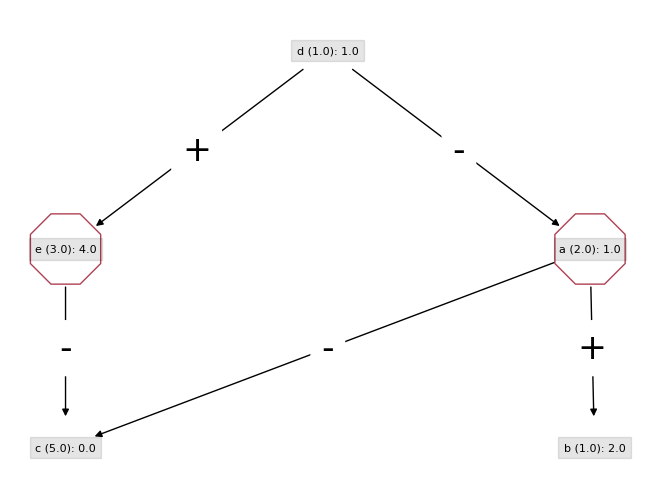

In [9]:
min_necessary_explanations = qbaf_1.minimalNSIExplanations(qbaf_2, 'b', 'c')
print(f'Minimal necessary explanations: {min_necessary_explanations}')
visualize(qbaf_2, explanations=min_necessary_explanations, with_fs=True)

## QBAF Arguments
Let us introduce the class QBAFArgument.

Note: Any object that is hashable can be used as argument (string, int, ...).

In [10]:
from qbaf import QBAFArgument

a = QBAFArgument(name='a', description='Shares from company X should be bought')
print(f"{a}")
print(f"{a = }")
print(f'{a.name = }')
print(f'{a.description = }')

Arg('a')
a = 'a'
a.name = 'a'
a.description = 'Shares from company X should be bought'


The attribute name is unmodifiable, whereas the attribute description is optional and modifiable.

In [11]:
b = QBAFArgument('b')
print(f'{b.name = }')

b.description = 'Shares from company X should be sold'
print(f'{b.description = }')

b.name = 'b'
b.description = 'Shares from company X should be sold'


Two arguments are equal iff their names are equal.

In [12]:
print(f'{a == b = }')

print(f"{a == QBAFArgument('a', 'Different description') = }")

a == b = False
a == QBAFArgument('a', 'Different description') = True


## QBAF semantics
The semantics can be selected only in the initialization of a QBAF.

The semantics is an optional argument that can be consulted with default value 'basic_model'.

In [13]:
args = ['a', 'b', 'c']
istrengths = [1, 1, 5]
att = [('a', 'c')]
supp = [('a', 'b')]
qbf = QBAFramework(args, istrengths, att, supp)

print(f'{qbf.semantics = }')

qbf.semantics = 'basic_model'


There are several semantics to choose from.
Each one with its one implementation of aggregation and influence functions.

In [14]:
for semantics in ["basic_model", "QuadraticEnergy_model", "SquaredDFQuAD_model",
                  "EulerBasedTop_model", "EulerBased_model", "DFQuAD_model"]:
    qbf_0 = QBAFramework(arguments=['a', 'b', 'c', 'd', 'e', 'f'],
                         initial_strengths=[0.5, 0.2, 0.85, 0.65, 0.4, 1],
                         attack_relations=[('c', 'a'), ('e', 'b'), ('f', 'c')],
                         support_relations=[('b', 'a'), ('d', 'a'), ('e', 'c')],
                         semantics=semantics)
    final_strengths = {arg: round(fs, 2) for arg, fs in qbf_0.final_strengths.items()}
    print(f"{semantics}'s final strengths: {final_strengths}")

basic_model's final strengths: {'e': 0.4, 'b': -0.2, 'f': 1.0, 'd': 0.65, 'c': 0.25, 'a': 0.7}
QuadraticEnergy_model's final strengths: {'e': 0.4, 'b': 0.17, 'f': 1.0, 'd': 0.65, 'c': 0.62, 'a': 0.52}
SquaredDFQuAD_model's final strengths: {'e': 0.4, 'b': 0.14, 'f': 1.0, 'd': 0.65, 'c': 0.53, 'a': 0.57}
EulerBasedTop_model's final strengths: {'e': 0.4, 'b': 0.15, 'f': 1.0, 'd': 0.65, 'c': 0.81, 'a': 0.47}
EulerBased_model's final strengths: {'e': 0.4, 'b': 0.15, 'f': 1.0, 'd': 0.65, 'c': 0.81, 'a': 0.5}
DFQuAD_model's final strengths: {'e': 0.4, 'b': 0.12, 'f': 1.0, 'd': 0.65, 'c': 0.34, 'a': 0.68}


## QBAF custom semantics
Your own semantics can be used by implementing your own aggregation and influence functions.

Optionally, you can set a max and min value for the initial strengths of your semantics.

In [15]:
qbf_0 = QBAFramework(arguments=['a', 'b', 'c', 'd', 'e', 'f'],
                      initial_strengths=[0.5, 0.2, 0.85, 0.65, 0.4, 1],
                      attack_relations=[('c', 'a'), ('e', 'b'), ('f', 'c')],
                      support_relations=[('b', 'a'), ('d', 'a'), ('e', 'c')],
                      aggregation_function=lambda att_s, supp_s : sum(supp_s) - sum(att_s),
                      influence_function=lambda w, s : w + s,
                      min_strength=-1.7976931348623157e+308,
                      max_strength=1.7976931348623157e+308)
print("Custom implementation of basic_model")
print(f'{qbf_0.semantics = }')
print(f'{qbf_0.min_strength = }')
print(f'{qbf_0.max_strength = }')
print(f'{qbf_0.final_strengths = }')

Custom implementation of basic_model
qbf_0.semantics = None
qbf_0.min_strength = -1.7976931348623157e+308
qbf_0.max_strength = 1.7976931348623157e+308
qbf_0.final_strengths = {'e': 0.4, 'b': -0.2, 'f': 1.0, 'd': 0.65, 'c': 0.25, 'a': 0.7}


## QBAF disjoint relations
Since it does not make much sense to have one argument attacking and supporting at the same time another argument, the property disjoint_relations has been added that is activated when its value is True (default).
If it is activated, it checks that the attack and support relations are disjoint.

In [16]:
args,initial_strengths,att,supp = ['a', 'b', 'c'], [1, 1, 5], [('a', 'c')], [('a', 'b')]
qbf = QBAFramework(args,initial_strengths, att, att + supp,
                   semantics="basic_model",
                   disjoint_relations=False)
print(f'{qbf.disjoint_relations = }')
print(f'{qbf.attack_relations.isdisjoint(qbf.support_relations) = }')

qbf.disjoint_relations = False
qbf.attack_relations.isdisjoint(qbf.support_relations) = False


In [17]:
# Now if we set the qbf to check if they are disjoint it will throw an Exception if they are not
try:
    qbf.disjoint_relations = True
except ValueError:
      print("Value error: attack_relations and support_relations are not disjoint")

Value error: attack_relations and support_relations are not disjoint


## QBAF Attributes
The QBAF contains arguments, attack relations, support relations and initial strengths.

### Arguments
Arguments can be consulted, added and removed.

Note that arguments that are contained in any attack/relation cannot be removed.
Also, adding arguments that already exist does nothing (it does not modify its initial strength).

In [18]:
args,initial_strengths,att,supp = ['a', 'b', 'c', 'd'], [1, 1, 5, 0], [('a', 'c')], [('a', 'b')]
qbf = QBAFramework(args,initial_strengths, att, supp)

print(f'{qbf.arguments = }')
print(f"{'a' in qbf.arguments = }")
print(f"{qbf.contains_argument('a') = }")

qbf.arguments = {'a', 'c', 'b', 'd'}
'a' in qbf.arguments = True
qbf.contains_argument('a') = True


In [19]:
qbf.remove_argument('d')
print("Remove argument 'd'")
print(f'{qbf.arguments = }')

qbf.add_argument('e', initial_strength=0) # initial_strength is optional. Defaults to 0.0
print("Add argument 'e'")
print(f'{qbf.arguments = }')

Remove argument 'd'
qbf.arguments = {'a', 'c', 'b'}
Add argument 'e'
qbf.arguments = {'e', 'a', 'b', 'c'}


### Attack/Support relations
Attack/Support relations can be consulted, added and removed.

They are instances of the class QBAFARelations, which represents a set of tuples of size 2.

In [20]:
args,initial_strengths,att,supp = ['a', 'b', 'c'], [1, 1, 5], [('a', 'c')], [('a', 'b')]
qbf = QBAFramework(args,initial_strengths, att, supp)

print(f'{qbf.attack_relations = }')
print(f'{qbf.support_relations = }')

print(f"{('a', 'c') in qbf.attack_relations = }")
print(f"{qbf.contains_attack_relation('a', 'c') = }")

print(f"{('b', 'a') in qbf.support_relations = }")
print(f"{qbf.contains_support_relation('b', 'a') = }")

qbf.attack_relations = QBAFARelations{('a', 'c')}
qbf.support_relations = QBAFARelations{('a', 'b')}
('a', 'c') in qbf.attack_relations = True
qbf.contains_attack_relation('a', 'c') = True
('b', 'a') in qbf.support_relations = False
qbf.contains_support_relation('b', 'a') = False


In [21]:
qbf.remove_attack_relation('a', 'c')
qbf.remove_support_relation('a', 'b')
print("Removing existing attack and support relations")

qbf.add_attack_relation('c', 'a')
qbf.add_support_relation('b', 'a')
print("Adding new attack and support relations")

print(f'{qbf.attack_relations = }')
print(f'{qbf.support_relations = }')

Removing existing attack and support relations
Adding new attack and support relations
qbf.attack_relations = QBAFARelations{('c', 'a')}
qbf.support_relations = QBAFARelations{('b', 'a')}


### Initial strengths
Initial strengths can be consulted and modified.

In [22]:
args,initial_strengths,att,supp = ['a', 'b', 'c'], [1, 1, 5], [('a', 'c')], [('a', 'b')]
qbf = QBAFramework(args,initial_strengths, att, supp)

print(f'{qbf.initial_strengths = }')
print(f"{qbf.initial_strength('a') = }")

qbf.initial_strengths = {'a': 1.0, 'b': 1.0, 'c': 5.0}
qbf.initial_strength('a') = 1.0


In [23]:
qbf.modify_initial_strength('a', 2)
print("Modify initial_strength of 'a'")

print(f'{qbf.initial_strengths = }')

Modify initial_strength of 'a'
qbf.initial_strengths = {'a': 2.0, 'b': 1.0, 'c': 5.0}


### Final strengths
Final strengths can be consulted and they are calculated making use of the aggregation and influence functions.

Every time the final strengths are calculated, they are stored so they can be used next time until the QBAF is modified.

When the final strengths are calculated, it is checked that the QBAF is acyclic. Otherwise, it throws and Exception.

In [24]:
args,initial_strengths,att,supp = ['a', 'b', 'c'], [1, 1, 5], [('a', 'c')], [('a', 'b')]
qbf = QBAFramework(args,initial_strengths, att, supp)

print(f'{qbf.isacyclic() = }')

print(f'{qbf.final_strengths = }')
print(f"{qbf.final_strength('a') = }")

qbf.isacyclic() = True
qbf.final_strengths = {'a': 1.0, 'c': 4.0, 'b': 2.0}
qbf.final_strength('a') = 1.0


## QBAF Additional functionality
Additional functionality regarding strength consistency, QBAF reversal and strength inconsistency explanations.

Note that when working with more than one QBAF, they are assumed to have the same semantics. It is not checked.

In [25]:
qbfa = QBAFramework(['a', 'b', 'c'], [2, 1, 5], [('a', 'c')], [('a', 'b')],
                   semantics="basic_model")

#qbfe = QBAFramework(['a', 'b', 'c', 'e'], [1, 1, 5, 3], [('a', 'c'), ('e', 'c')], [('a', 'b')])
qbfe = qbfa.copy()
qbfe.modify_initial_strength('a', 1)
qbfe.add_argument('e', 3)
qbfe.add_attack_relation('e', 'c')

print(f"{qbfa.final_strengths = }")
print(f"{qbfe.final_strengths = }")

qbfa.final_strengths = {'a': 2.0, 'c': 3.0, 'b': 3.0}
qbfe.final_strengths = {'a': 1.0, 'e': 3.0, 'c': 1.0, 'b': 2.0}


### Strength Consistency
It can be checked if two arguments are strength consistent w.r.t. two QBAFs.

In [26]:
print(f"{qbfe.are_strength_consistent(qbfa, 'b', 'c') = }")

qbfe.are_strength_consistent(qbfa, 'b', 'c') = False


### Reversal

QBAF Reversal of a set of arguments w.r.t. two QBAFs returns a new QBAF.

In [27]:
reversal = qbfe.reversal(qbfa, {'e'})

print(f"{reversal.final_strengths = }")

reversal.final_strengths = {'a': 1.0, 'c': 4.0, 'b': 2.0}


### Strength Inconsistency Explanation

It can be checked if a set of arguments is a Sufficient, Necessary or Counterfactual Strength Inconsistency Explanation of two arguments w.r.t. two QBAFs.

In [28]:
explanations = {"Sufficient SI Explanation": qbfe.isSSIExplanation(qbfa, {'e'}, 'b', 'c'),
                "Necessary SI Explanation": qbfe.isNSIExplanation(qbfa, {'e'}, 'b', 'c'),
                "Counterfactual SI Explanation": qbfe.isCSIExplanation(qbfa, {'e'}, 'b', 'c')}
for e in explanations:
    if explanations[e]:
        print("{'e'} is a %s of 'a' and 'b' w.r.t. qbfe and qbfa" % e)
    else:
        print("{'e'} is NOT a %s of 'a' and 'b' w.r.t. qbfe and qbfa" % e)

{'e'} is a Sufficient SI Explanation of 'a' and 'b' w.r.t. qbfe and qbfa
{'e'} is NOT a Necessary SI Explanation of 'a' and 'b' w.r.t. qbfe and qbfa
{'e'} is NOT a Counterfactual SI Explanation of 'a' and 'b' w.r.t. qbfe and qbfa


### $\subset$-minimal SI Explanations
All the $\subset$-minimal Sufficient, Necessary or Counterfactual Strength Inconsistency Explanation set of arguments can be computed w.r.t. two arguments and two QBAFs.

In [29]:
explanations = {"Sufficient SI Explanations": qbfe.minimalSSIExplanations(qbfa, 'b', 'c'),
                "Necessary SI Explanations": qbfe.minimalNSIExplanations(qbfa, 'b', 'c'),
                "Counterfactual SI Explanations": qbfe.minimalCSIExplanations(qbfa, 'b', 'c')}
for e in explanations:
    print("Subset-minimal %s of 'a' and 'b' w.r.t. qbfe and qbfa: %s" % (e, str(explanations[e])))

Subset-minimal Sufficient SI Explanations of 'a' and 'b' w.r.t. qbfe and qbfa: [{'a'}, {'e'}]
Subset-minimal Necessary SI Explanations of 'a' and 'b' w.r.t. qbfe and qbfa: [{'a', 'e'}]
Subset-minimal Counterfactual SI Explanations of 'a' and 'b' w.r.t. qbfe and qbfa: [{'a', 'e'}]
